In [7]:
import numpy as np
from uavsar_pytools.convert.tiff_conversion import read_annotation
import matplotlib.pyplot as plt

In [11]:
desc = read_annotation('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann')

In [15]:
columns = desc['slc_1_1x1 columns']['value']
rows = desc['slc_1_1x1 rows']['value']
original_size = columns*rows

In [21]:
original_size/new_size

36.857134931674985

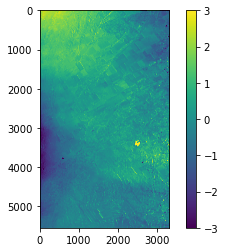

In [56]:
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/20210115T1910_20210120T2040.unw_snaphu.unw.vrt') as src:
    arr = src.read(2)

plt.imshow(arr, vmin = -3, vmax = 3)
plt.colorbar()

In [1]:
from geolocate import geolocate_uavsar

/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
geolocate_uavsar(in_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/20210115T1910_20210120T2040.unw_snaphu.unw.vrt',
ann_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann', 
out_dir = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase', 
llh_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.llh')

['/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/20210115T1910_20210120T2040.unw_snaphu.unw.tif.unw.tif']

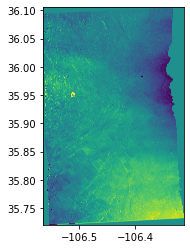

In [3]:
import rasterio as rio
from rasterio.plot import show
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/20210115T1910_20210120T2040.unw_snaphu.unw.tif.unw.tif') as src:
    show(src, vmin = -3, vmax = 3)

In [2]:
geolocate_uavsar(in_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc',
ann_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann', 
out_dir = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase', 
llh_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.llh')

['/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc.real.tif',
 '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc.imag.tif']

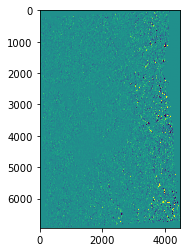

In [3]:
import rasterio as rio
import matplotlib.pyplot as plt
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_20005_003_200212_L090HH_01_BU_s1_1x1.slc.real.tif') as src:
    arr = src.read(1)
plt.imshow(arr, vmin = -.1, vmax = .1)

In [2]:
geolocate_uavsar(in_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.lkv',
ann_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann', 
out_dir = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase', 
llh_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.llh')

['/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_01_BU_s1_2x8.lkv.x.tif',
 '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_01_BU_s1_2x8.lkv.y.tif',
 '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_01_BU_s1_2x8.lkv.z.tif']

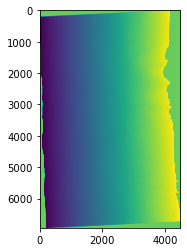

In [5]:
import rasterio as rio
import matplotlib.pyplot as plt
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/phase/alamos_35915_01_BU_s1_2x8.lkv.x.tif') as src:
    plt.imshow(src.read(1))